### Prévision taux de régularité des TER de la SNCF

L'objectif de cette partie est de modéliser l'évolution du taux de régularité des TER de la SNCF afin de pouvoir à terme, prédire les taux des prochaines années.

Ayant accès aux données mensuelles, nous utiliserons dans  notre démarche l'une des modèles de la classe `SARIMA`.

In [29]:
#filtration des warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
# afficher tout le contenu des cellules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Nous utilisons essentiellement le module `tsa` de `statsmodels` qui regorge essentiellement les fonctions et objets pour modéliser les séries temporelles.

In [31]:
# !pip install statsmodels

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats
import datetime # pour la gestion des dates

#### Récupération et examen des données

Nous utilisons le jeu de données `Recuperation_données_regularité` issu des travaux d'analyse descriptive de la régularité des TER de la SNCF.

Elle agrège par mois depuis 2013 (jusqu'à novembre 2022) les données sur la régularité des TER de la SNCF au plan national.

In [33]:
# Récupération des données sur la régularité des TER (regularite-mensuelle-ter)
regTER = pd.read_csv("Jeux de données/base_regularité_france.csv", index_col="date", parse_dates=["date"]) 


In [34]:
regTER.shape
regTER.head()
regTER.tail()

(119, 9)

,Unnamed: 0,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,annee,mois
date,,,,,,,,,
2013-01-01,0,189899.0,186282.0,3617.0,17089.0,90.826274,9.900696,2013,1
2013-02-01,1,171409.0,168932.0,2477.0,14561.0,91.380555,10.601676,2013,2
2013-03-01,2,182332.0,176546.0,5786.0,15731.0,91.089574,10.222808,2013,3
2013-04-01,3,177483.0,174054.0,3429.0,13176.0,92.429936,12.209927,2013,4
2013-05-01,4,177082.0,174735.0,2347.0,12478.0,92.858901,13.003446,2013,5


,Unnamed: 0,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,annee,mois
date,,,,,,,,,
2022-07-01,114,195311.0,189448.0,5863.0,18314.0,90.332967,9.344436,2022,7
2022-08-01,115,204536.0,200070.0,4466.0,15435.0,92.285200,11.962099,2022,8
2022-09-01,116,214659.0,209830.0,4829.0,15926.0,92.410046,12.175311,2022,9
2022-10-01,117,206119.0,201039.0,5080.0,17987.0,91.052980,10.176906,2022,10
2022-11-01,118,202715.0,197533.0,5182.0,18953.0,90.405147,9.422255,2022,11


In [35]:
regTER.columns
regTER.describe()

Index(['Unnamed: 0', 'nombre_de_trains_programmes',
       'nombre_de_trains_ayant_circule', 'nombre_de_trains_annules',
       'nombre_de_trains_en_retard_a_l_arrivee', 'taux_de_regularite',
       'nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee',
       'annee', 'mois'],
      dtype='object')

,Unnamed: 0,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,annee,mois
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,59.000000,184697.058824,180901.991597,3880.663866,15194.134454,91.602385,11.358562,2017.462185,6.453782
std,34.496377,27515.164639,27019.777682,1490.064640,3489.758723,1.604397,2.490460,2.866492,3.443855
min,0.000000,35184.000000,35045.000000,139.000000,1463.000000,86.271703,6.284225,2013.000000,1.000000
25%,29.500000,177532.500000,174394.500000,3095.500000,12979.000000,90.744298,9.804155,2015.000000,3.500000
50%,59.000000,189590.000000,186282.000000,3646.000000,15455.000000,91.627054,10.943227,2017.000000,6.000000
75%,88.500000,200641.000000,196758.500000,4371.000000,17660.000000,92.762162,12.816415,2020.000000,9.000000
max,118.000000,221206.000000,216145.000000,12265.000000,25990.000000,95.825367,22.954204,2022.000000,12.000000


`taux_de_regularite` est la variable cible du modèle à mettre en oeuvre

#### Comment est calculé le taux de régularité ?

L'indicateur de ponctualité `taux_de_regularite` serait le rapport entre le nombre de TER à l'heure et du nombre de TER en circulation.

#### Examen de la variable

In [36]:
regTER[regTER["taux_de_regularite"].isnull()]
regTER[regTER["taux_de_regularite"].isnull()].shape

,Unnamed: 0,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,annee,mois
date,,,,,,,,,


(0, 9)

Il ressort qu'aucune valeur n'est manquante dans la variable.

Examinons dès à présent sa distribution avec un histogramme

In [37]:
plt.style.use("seaborn")

<Figure size 700x300 with 0 Axes>

Text(0.5, 1.0, 'Distribution de la variable taux_de_regularité')

<AxesSubplot: title={'center': 'Distribution de la variable taux_de_regularité'}, xlabel='taux_de_regularite', ylabel='Count'>

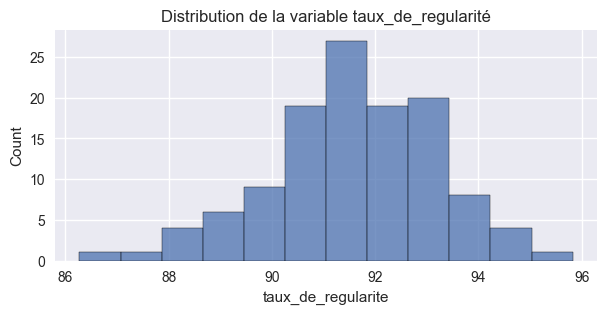

In [38]:
plt.figure(figsize = (7,3))
plt.title("Distribution de la variable taux_de_regularité")
sns.histplot(regTER["taux_de_regularite"])

La distribution ne semble pas symétrique. Elle est légèrement étalée vers la gauche.

Jetons un oeil à sa densité comparativement à celle d'une loi normale de mêmes paramètres.

<Figure size 700x400 with 0 Axes>

<AxesSubplot: ylabel='Density'>

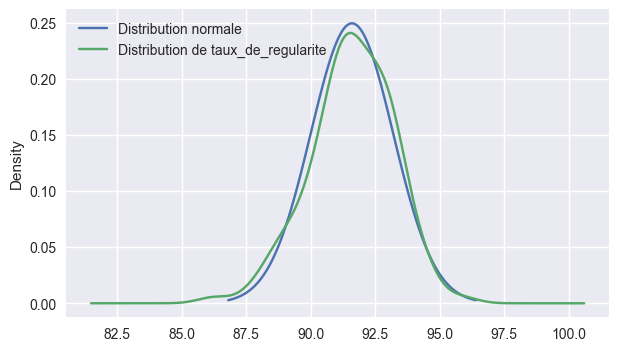

In [39]:
plt.figure(figsize = (7,4))
mu, sigma = np.mean(regTER["taux_de_regularite"]), np.std(regTER["taux_de_regularite"])
rvs = np.linspace(mu - 3*sigma, mu + 3*sigma, 119)
ech = scipy.stats.norm.pdf(rvs, mu, sigma)
plt.plot(rvs,ech, label = "Distribution normale")
regTER["taux_de_regularite"].plot(kind = "density", label = "Distribution de taux_de_regularite")
plt.legend()

La distribution de `taux_de_regularite` à elle, a une queue plus longue.

### Modélisation

In [40]:
import statsmodels as stm
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.graphics.tsaplots as plts
from statsmodels.tsa.arima.model import ARIMA

Transformons la variable `date` en date reconnue par Python

Quelle est l'évolution du taux de regularité ?

<Figure size 1500x500 with 0 Axes>

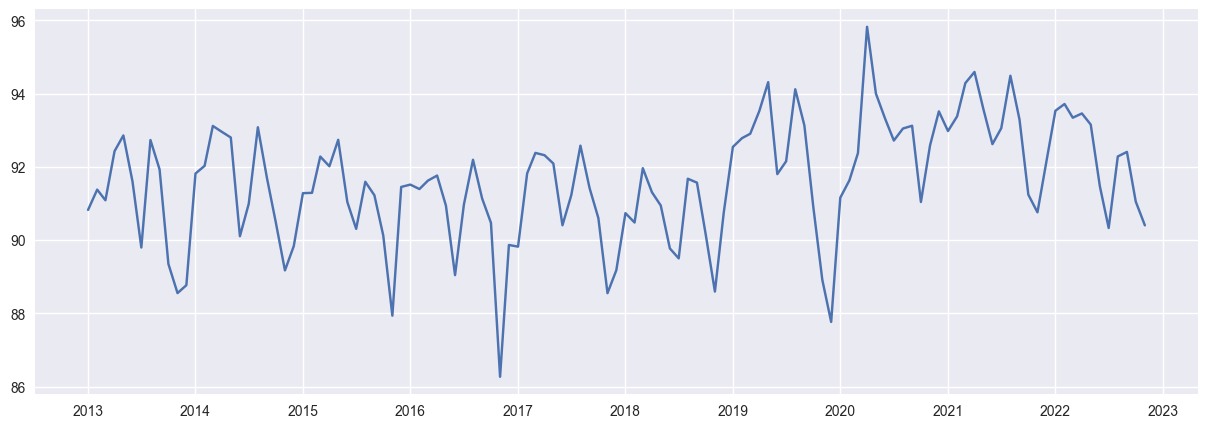

In [41]:
plt.figure(figsize = (15,5))
plt.plot(regTER.taux_de_regularite)
#plt.xticks([])
plt.show()


L'évolution du taux de régularité est assez irrégulière, tantôt à la hausse, tantot à la baisse. 
Nous ne percevons aucune tendance remarquable. Rien n'indique également une stationnarité (de second ordre) de la série.

Examinons les diagrammes d'autocorrélation et d'autocorrélation partielle

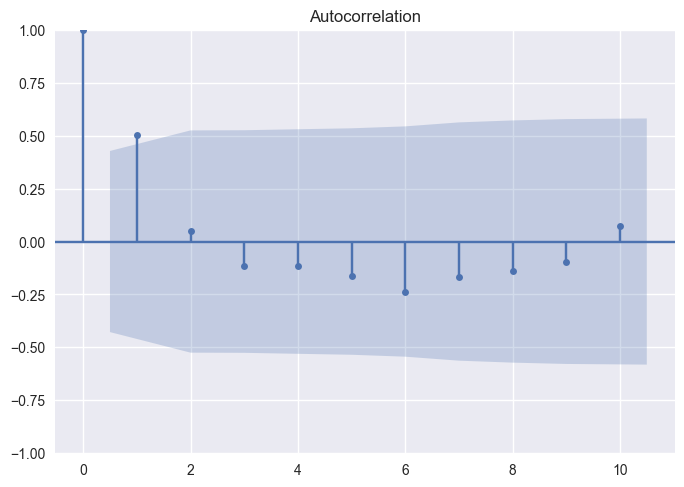

In [42]:
figacf = plts.plot_acf(acf(regTER["taux_de_regularite"]), lags = 10)

<Figure size 600x300 with 0 Axes>

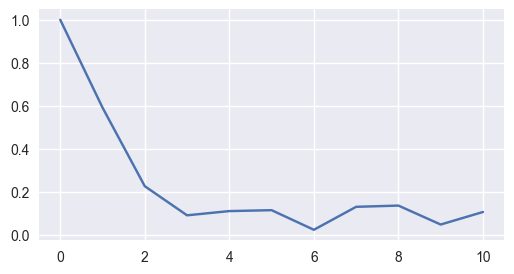

In [43]:
plt.figure(figsize = (6,3))
plt.plot(acf(regTER["taux_de_regularite"], nlags= 10))

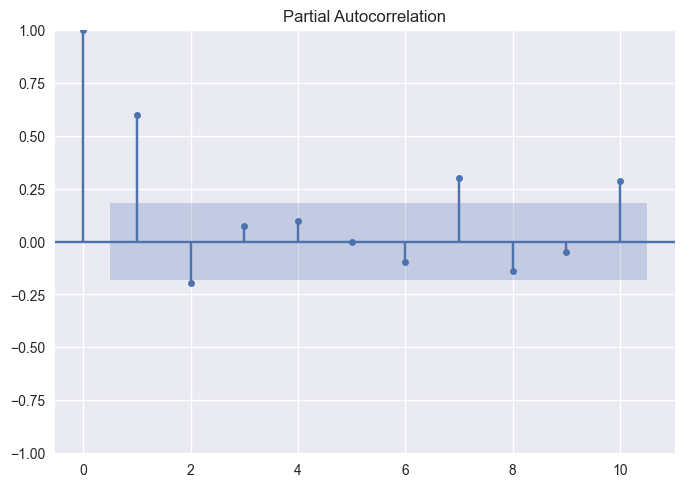

In [44]:
fig = plts.plot_pacf(regTER["taux_de_regularite"], lags = 10)

<Figure size 600x300 with 0 Axes>

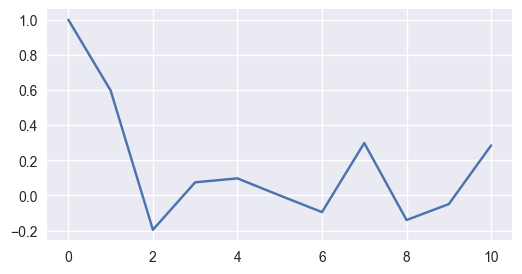

In [45]:
plt.figure(figsize = (6,3))
plt.plot(pacf(regTER["taux_de_regularite"], nlags = 10))

Des quatre graphiques ci-dessus, on retient que ni les autocorrélations, ni les autocorrélations partielles ne décroissent (ni exponentiellement ni géométriquement). L'algorithme de `Box-Jenkins` ne permet pas d'identifier un processus sous-jacent `AR` ou encore `MA`.

Nous envisageons un processus `ARMA`, mais avant testons la stationnarité de la série.

#### Stationnarité

Nous réalisons le test de Dicker-Fuller Augmenté

In [46]:
 # Test Dickey–Fuller :
result = stm.tsa.stattools.adfuller(regTER.taux_de_regularite)
print('Statistique ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistique ADF : -1.2690149286540533
p-value : 0.6432261537156603
Valeurs Critiques :
	1%: -3.4936021509366793
	5%: -2.8892174239808703
	10%: -2.58153320754717


L'hypothèse nulle ne peut-être rejetée pour aucun des seuils (1%, 5% et 10%). Il n'y a donc pas stationnarité de la série.

En supposant la série est de type `DS`, différencions la série une fois.

In [47]:
regTER["taux_de_regularite_diff"] = regTER["taux_de_regularite"].diff()

<Figure size 700x300 with 0 Axes>

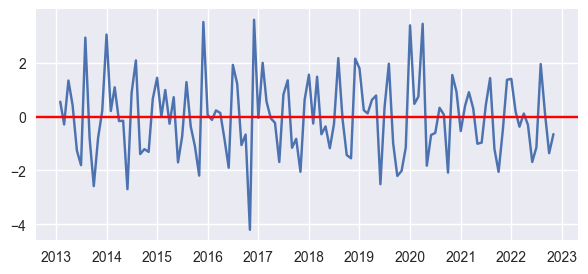

In [48]:
plt.figure(figsize =(7,3))
plt.plot(regTER[regTER["taux_de_regularite_diff"].notnull()]["taux_de_regularite_diff"])
plt.axhline(y = 0, color = "red")

Visuellement, on peut déjà soupconner une nullité de la moyenne et une constance de la variance.

Réalisons de nouveau le test ADF.

In [49]:
 # Test Dickey–Fuller :
result = stm.tsa.stattools.adfuller(regTER[regTER["taux_de_regularite_diff"].notnull()]["taux_de_regularite_diff"])
print('Statistique ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistique ADF : -4.886908612322023
p-value : 3.697942371840292e-05
Valeurs Critiques :
	1%: -3.4936021509366793
	5%: -2.8892174239808703
	10%: -2.58153320754717


Le test est satisfaisant au seuil de 1%, 5% et 10%.

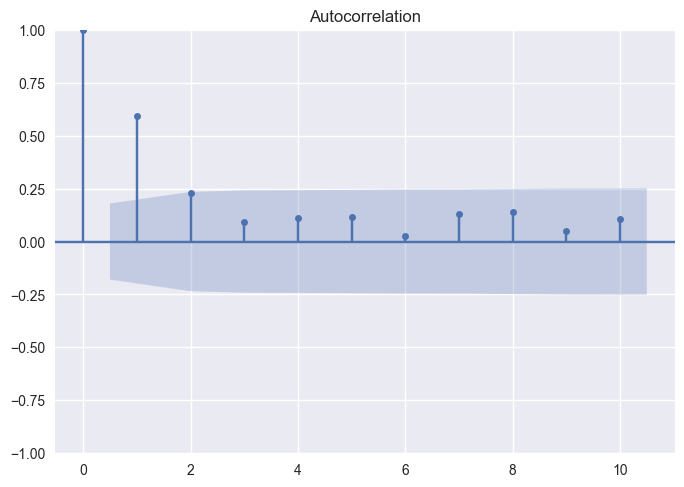

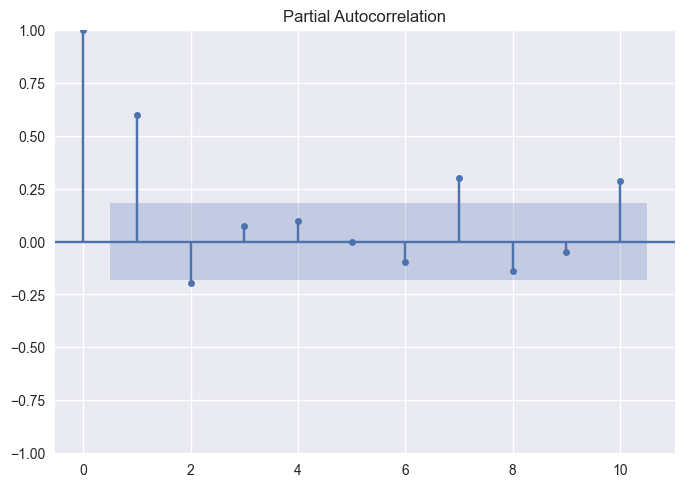

In [50]:
figacf = plts.plot_acf(regTER["taux_de_regularite"], lags = 10)
figpacf = plts.plot_pacf(regTER["taux_de_regularite"], lags = 10)

Il n'est toujours pas possible d'isoler un processus `AR` ou `MA`.  Retrouvons le modèle `ARIMA` optimal.

#### ARIMA(p,1,q)

Nous simulerons plusieurs processus `ARIMA(p,1,q)` et on retient le processus qui optimise le `MAPE` (Mean Perccentage Absolute Error)

In [51]:
mape, p, q = 10000, 0, 0
for P in range(6) :
    for Q in range(6) :
        if P == 0 or Q == 0 :
            pass
        else : 
            model = ARIMA(regTER["taux_de_regularite"], order=(P, 1, Q)) # modele ARIMA(P,1,Q)
            results = model.fit()
            MAPE = np.mean(np.abs((results.fittedvalues - regTER["taux_de_regularite"])/regTER["taux_de_regularite"]))
            if MAPE<mape :
                mape = MAPE
                p = P
                q = Q

In [52]:
mape, p, q

(0.01833342448597646, 3, 5)

Le processus `ARIMA(3,1,5)` est celui qui minimise le `MAPE`.

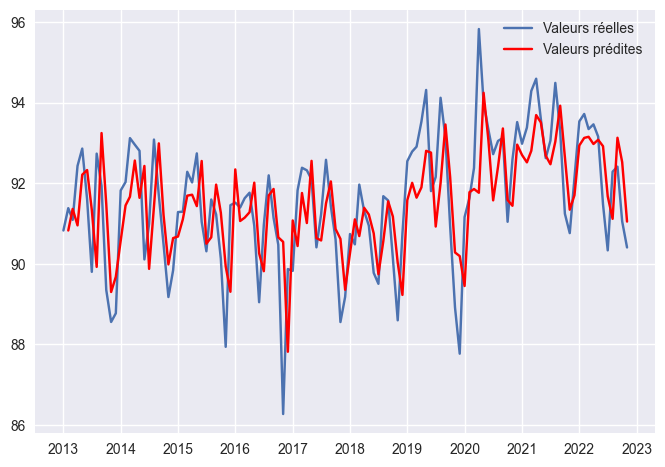

In [53]:
model = stm.tsa.arima.model.ARIMA(regTER["taux_de_regularite"], order=(2,1,4))
results = model.fit()
plt.plot(regTER["taux_de_regularite"], label = "Valeurs réelles")
plt.plot(results.fittedvalues[1:], color='red', label = "Valeurs prédites")
plt.legend()

Observons les valeurs prédites sur un graphique avec notamment les prévision des septs prochains mois.

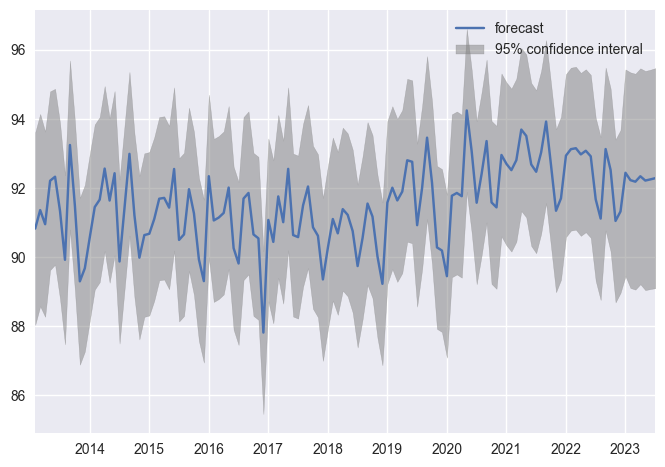

In [68]:
pred = plts.plot_predict(results, start = 1, end = 126)